In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("D:/DATA SCIENCE/Project/1. Classification for Campaigning/Customer_Campaign.csv")

In [3]:
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
dataset["pdays"].count()

45211

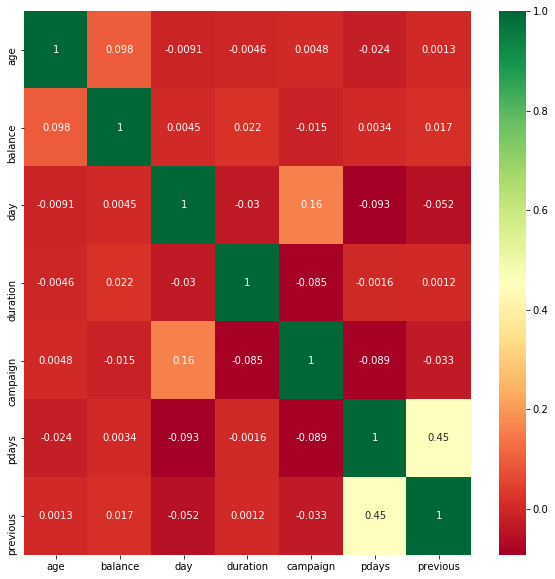

In [6]:
corrmat = dataset.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,10))
corrmap = sns.heatmap(dataset[corr_features].corr(),annot=True, cmap="RdYlGn")

In [7]:
dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [8]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
data = dataset[["age","job","marital","education","housing","loan","contact","duration","campaign","previous","y"]]

In [10]:
data

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,y
0,58,management,married,tertiary,yes,no,unknown,261,1,0,no
1,44,technician,single,secondary,yes,no,unknown,151,1,0,no
2,33,entrepreneur,married,secondary,yes,yes,unknown,76,1,0,no
3,47,blue-collar,married,unknown,yes,no,unknown,92,1,0,no
4,33,unknown,single,unknown,no,no,unknown,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,cellular,977,3,0,yes
45207,71,retired,divorced,primary,no,no,cellular,456,2,0,yes
45208,72,retired,married,secondary,no,no,cellular,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,no,telephone,508,4,0,no


In [11]:
data.isnull().any()

age          False
job          False
marital      False
education    False
housing      False
loan         False
contact      False
duration     False
campaign     False
previous     False
y            False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6F39AF7C8>,
      dtype=object)

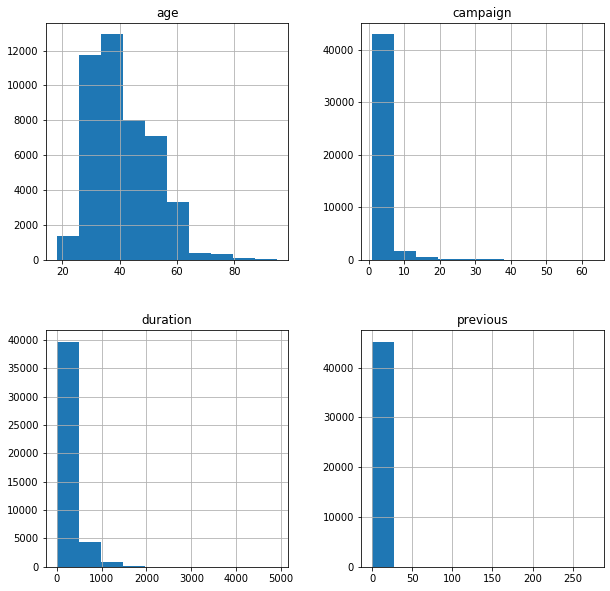

In [12]:
data.hist(figsize=(10,10))

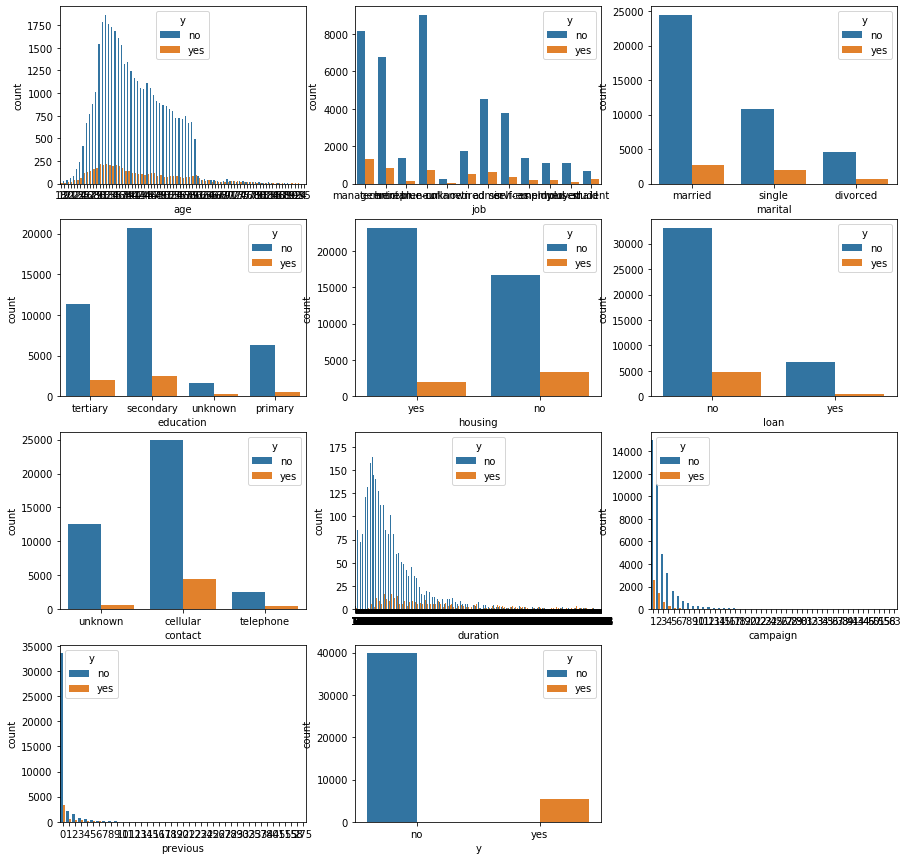

In [13]:
plt.figure(figsize=(15,15))
for i,col in enumerate(data,1):
    plt.subplot(4,3,i)
    sns.countplot(data[col], hue=(data["y"]))

In [14]:
x = data.iloc[:,0:10]
x

,age,job,marital,education,housing,loan,contact,duration,campaign,previous
0,58,management,married,tertiary,yes,no,unknown,261,1,0
1,44,technician,single,secondary,yes,no,unknown,151,1,0
2,33,entrepreneur,married,secondary,yes,yes,unknown,76,1,0
3,47,blue-collar,married,unknown,yes,no,unknown,92,1,0
4,33,unknown,single,unknown,no,no,unknown,198,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,cellular,977,3,0
45207,71,retired,divorced,primary,no,no,cellular,456,2,0
45208,72,retired,married,secondary,no,no,cellular,1127,5,3
45209,57,blue-collar,married,secondary,no,no,telephone,508,4,0


In [15]:
y = data.iloc[:,10]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [16]:
import imblearn.pipeline as pl
from imblearn.over_sampling import SMOTE

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [18]:
numeric_transformer = Pipeline(steps=[('numeric_imputer',SimpleImputer(strategy="mean")),('Scaler',MinMaxScaler())])

In [19]:
categorical_transformer = Pipeline(steps=[('categorical_imputer',SimpleImputer(strategy="most_frequent")),('ohe',OneHotEncoder())])

In [20]:
x.head()

,age,job,marital,education,housing,loan,contact,duration,campaign,previous
0,58,management,married,tertiary,yes,no,unknown,261,1,0
1,44,technician,single,secondary,yes,no,unknown,151,1,0
2,33,entrepreneur,married,secondary,yes,yes,unknown,76,1,0
3,47,blue-collar,married,unknown,yes,no,unknown,92,1,0
4,33,unknown,single,unknown,no,no,unknown,198,1,0


In [21]:
numeric_features = ["age","duration","campaign","previous"]

In [22]:
categorical_features = ["job","marital","education","housing","loan","contact"]

In [23]:
preprocessor = ColumnTransformer(transformers=[('numeric',numeric_transformer,numeric_features),('categorical',categorical_transformer,categorical_features)],remainder="passthrough")

In [24]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('numeric_imputer',
                                                  SimpleImputer()),
                                                 ('Scaler', MinMaxScaler())]),
                                 ['age', 'duration', 'campaign', 'previous']),
                                ('categorical',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder())]),
                                 ['job', 'marital', 'education', 'housing',
                                  'loan', 'contact'])])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
n_estimators=list(np.linspace(start=200,stop=800,num=3,dtype="int"))
max_features=['sqrt']
criterion=["gini"]
max_depth=np.linspace(5,20,num=3,dtype="int")
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,5]

In [32]:
param_grid={"n_estimators":n_estimators,"max_features":max_features,"criterion":criterion,"max_depth":max_depth,"min_samples_split":min_samples_split,
           "min_samples_leaf":min_samples_leaf}

In [33]:
rf = pl.Pipeline(steps=[('preprocessor',preprocessor),("smote",SMOTE(random_state=42)),('Classifier', GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='accuracy',cv=5,n_jobs=4))])

In [34]:
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                           

In [35]:
y_pred_train = rf.predict(x_train)

In [36]:
y_pred = rf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_train, y_pred_train)

0.9612917496129175

In [39]:
accuracy_score(y_test, y_pred)

0.8601127944266284

# Saving Model

In [40]:
import joblib

In [41]:
joblib.dump(rf,"customercampaginmodel.pkl")

['customercampaginmodel.pkl']

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          no       0.99      0.96      0.98     31970
         yes       0.78      0.94      0.85      4198

    accuracy                           0.96     36168
   macro avg       0.88      0.95      0.91     36168
weighted avg       0.97      0.96      0.96     36168



In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.90      0.92      7952
         yes       0.44      0.60      0.51      1091

    accuracy                           0.86      9043
   macro avg       0.69      0.75      0.71      9043
weighted avg       0.88      0.86      0.87      9043



In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_train,y_pred_train)

array([[30842,  1128],
       [  272,  3926]], dtype=int64)

In [47]:
confusion_matrix(y_test,y_pred)

array([[7118,  834],
       [ 431,  660]], dtype=int64)

# Real Time Predictions

In [48]:
model=joblib.load("customercampaginmodel.pkl")

In [64]:
data1=pd.DataFrame([[58,'management','married','tertiary','yes','no','unknown',261,1,0]])

In [70]:
data1.columns=['age','job','marital','education','housing','loan','contact','duration','campaign','previous']

In [71]:
data1

,age,job,marital,education,housing,loan,contact,duration,campaign,previous
0,58,management,married,tertiary,yes,no,unknown,261,1,0


In [72]:
model.predict(data1)

array(['no'], dtype=object)